In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 4s 0us/step


In [4]:
print("Sample review (encoded):", x_train[0])


Sample review (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
print("Sample label:", y_train[0])

Sample label: 1


In [6]:
max_len = 500
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [7]:
print("Padded review shape:", x_train[0].shape)

Padded review shape: (500,)


In [8]:
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_len),  # Word embeddings
    Flatten(),  # Flatten the 2D output into 1D
    Dense(128, activation='relu'),  # Hidden layer
    Dropout(0.5),  # Regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/5
391/391 [==============================] - 96s 242ms/step - loss: 0.4368 - accuracy: 0.7763 - val_loss: 0.2946 - val_accuracy: 0.8729
Epoch 2/5
391/391 [==============================] - 93s 238ms/step - loss: 0.1097 - accuracy: 0.9608 - val_loss: 0.3589 - val_accuracy: 0.8592
Epoch 3/5
391/391 [==============================] - 89s 228ms/step - loss: 0.0105 - accuracy: 0.9977 - val_loss: 0.4687 - val_accuracy: 0.8692
Epoch 4/5
391/391 [==============================] - 88s 224ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.5178 - val_accuracy: 0.8686
Epoch 5/5
391/391 [==============================] - 88s 224ms/step - loss: 5.7527e-04 - accuracy: 1.0000 - val_loss: 0.5601 - val_accuracy: 0.8696


In [11]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

782/782 [==============================] - 12s 16ms/step - loss: 0.5601 - accuracy: 0.8696

Test Accuracy: 86.96%


In [12]:
import matplotlib.pyplot as plt

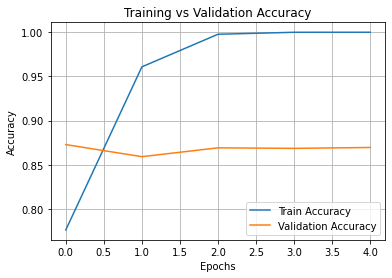

In [13]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}


1641221/1641221 [==============================] - 0s 0us/step


In [15]:
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

In [16]:
import numpy as np
sample_index = 0
sample_review = x_test[sample_index].reshape(1, -1)  # Reshape for prediction
prediction = model.predict(sample_review)[0][0]

1/1 [==============================] - 0s 122ms/step


In [17]:
print("\n--- Sample Review Text ---")
print(decode_review(imdb.get_test_data()[0][sample_index]))  # original review, unpadded



--- Sample Review Text ---


AttributeError: module 'keras.api._v2.keras.datasets.imdb' has no attribute 'get_test_data'